In [2]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv('titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


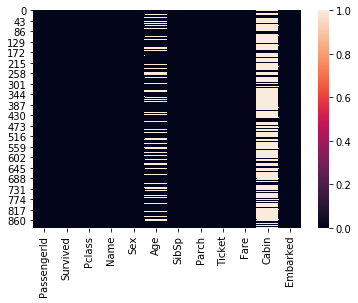

In [4]:
import seaborn as sns
sns.heatmap(train.isnull())

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

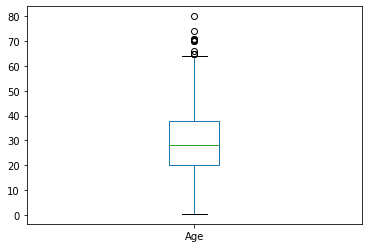

In [6]:
train["Age"].plot.box()

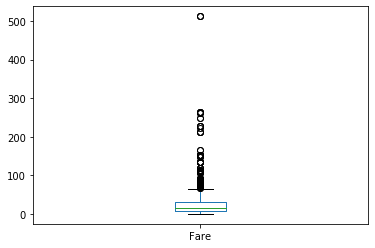

In [7]:
train["Fare"].plot.box()

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
train['Cabin']=imp.fit_transform(train['Cabin'].values.reshape(-1,1))
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy='mean')
train['Age']=imp.fit_transform(train['Age'].values.reshape(-1,1))

In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [11]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
train['Embarked']=imp.fit_transform(train['Embarked'].values.reshape(-1,1))
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
le=LabelEncoder()
list1=['Sex','Cabin','Embarked']
for val in list1:
    train[val]=le.fit_transform(train[val].astype(str))
    

In [14]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,47,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,47,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,47,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,47,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,60,0


In [15]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

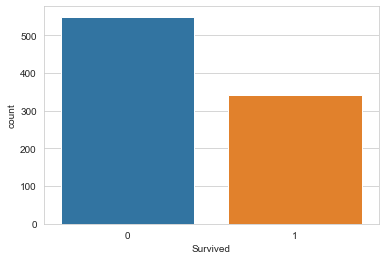

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

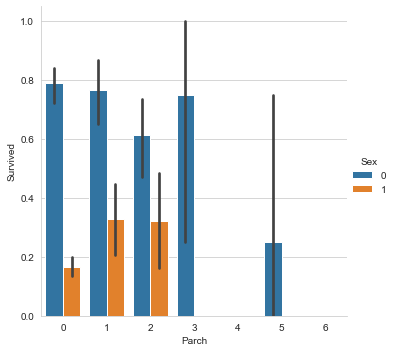

In [18]:
sns.catplot(x="Parch",y="Survived",hue="Sex",data=train,kind="bar")
plt.show()

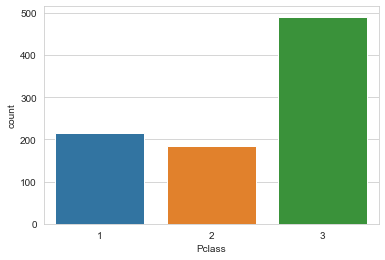

In [19]:
sns.countplot(x='Pclass',data=train)

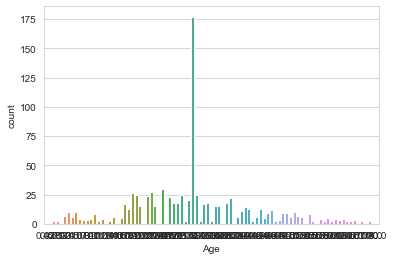

In [20]:
sns.countplot(x='Age',data=train)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


In [22]:
train.drop(['Name','Ticket'],axis=1,inplace=True)
# this I did not see properly, I thought that you are dropping survived here.. anyways, just uncomment it while running the whole code next time
# anything else? yes sir


In [23]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,47,2
1,2,1,1,0,38.000000,1,0,71.2833,81,0
2,3,1,3,0,26.000000,0,0,7.9250,47,2
3,4,1,1,0,35.000000,1,0,53.1000,55,2
4,5,0,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,47,2
887,888,1,1,0,19.000000,0,0,30.0000,30,2
888,889,0,3,0,29.699118,1,2,23.4500,47,2
889,890,1,1,1,26.000000,0,0,30.0000,60,0


In [24]:
from scipy.stats import zscore
z=np.abs(zscore(train))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.50244517, 0.28188124,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.78684529, 1.16154512,
        1.9423032 ],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.48885426, 0.28188124,
        0.58595414],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 0.17626324, 0.28188124,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.04438104, 0.27001707,
        1.9423032 ],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.49237783, 0.28188124,
        0.67817453]])

In [25]:
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
        88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
       183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
       311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
       434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
       558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
       686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
       774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
       863, 885], dtype=int64), array([8, 8, 6, 5, 6, 7, 5, 5, 8, 5, 5, 8, 6, 7, 4, 4, 7, 5, 8, 8, 5, 5,
       6, 5, 5, 5, 8, 8, 5, 8, 5, 8, 7, 5, 8, 5, 5, 7, 8, 7, 5, 8, 8, 8,
       7, 8, 6, 8, 7, 7, 5, 8, 8, 6, 6, 7, 8, 8, 5, 4, 8, 7, 5, 5, 7, 8,
       6, 8, 8, 6, 8, 4, 6, 8, 4, 6, 7, 5, 5, 7, 8, 7, 8, 7, 8, 7, 6, 7,
       7, 4, 8, 6, 8, 7, 5, 5, 8, 5, 5, 8, 5, 5, 4, 6, 5, 6], dtype=int64))


In [26]:
train.shape

(891, 10)

In [27]:
train=train[(z<3).all(axis=1)]

In [28]:
train.shape

(786, 10)

In [29]:
train.skew()

PassengerId   -0.000225
Survived       0.482496
Pclass        -0.682742
Sex           -0.696326
Age            0.369202
SibSp          2.036616
Parch          2.202885
Fare           2.385572
Cabin          2.136288
Embarked      -1.257553
dtype: float64

In [30]:
import numpy as np
for col in train.columns:
    if train.skew().loc[col]>0.55:
         train[col]=np.log1p(train[col])

In [31]:
train.skew()

PassengerId   -0.000225
Survived       0.482496
Pclass        -0.682742
Sex           -0.696326
Age            0.369202
SibSp          1.337547
Parch          1.915712
Fare           0.216241
Cabin         -3.548209
Embarked      -1.257553
dtype: float64

In [ ]:
from scipy.stats import boxcox
train= boxcox(train)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [33]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,446.942748,0.382952,2.333333,0.664122,29.750921,0.217340,0.151018,2.840495,3.889410,1.534351
std,255.668103,0.486416,0.819093,0.472597,11.903917,0.364017,0.332187,0.894210,0.380958,0.791332
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,227.250000,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,2.185579,3.871201,1.000000
50%,448.500000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,2.639057,3.871201,2.000000
75%,661.750000,1.000000,3.000000,1.000000,34.375000,0.693147,0.000000,3.316003,3.871201,2.000000
max,891.000000,1.000000,3.000000,1.000000,66.000000,1.386294,1.098612,5.111184,4.828314,2.000000


In [34]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
train_df = train.drop("Survived", axis = 1)
train_target =train.iloc[:,1]

In [36]:
train_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.000000,0.693147,0.000000,2.110213,3.871201,2
1,2,1,0,38.000000,0.693147,0.000000,4.280593,4.406719,0
2,3,3,0,26.000000,0.000000,0.000000,2.188856,3.871201,2
3,4,1,0,35.000000,0.693147,0.000000,3.990834,4.025352,2
4,5,3,1,35.000000,0.000000,0.000000,2.202765,3.871201,2
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0.000000,0.000000,2.639057,3.871201,2
887,888,1,0,19.000000,0.000000,0.000000,3.433987,3.433987,2
888,889,3,0,29.699118,0.693147,1.098612,3.196630,3.871201,2
889,890,1,1,26.000000,0.000000,0.000000,3.433987,4.110874,0


In [37]:
train_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 786, dtype: int64

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,train_df,train_target):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(train_df,train_target,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",i,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i
             

In [39]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
r_state=maxr2_score(lreg,train_df,train_target)

r2 score corresponding to 42 is -0.24430748159561722
r2 score corresponding to 43 is -0.006862745098039413
r2 score corresponding to 44 is 0.15053763440860202
r2 score corresponding to 45 is -0.08965517241379328
r2 score corresponding to 46 is 0.11528326745718043
r2 score corresponding to 47 is 0.015313390313390074
r2 score corresponding to 48 is 0.21588089330024818
r2 score corresponding to 49 is 0.06540476592867994
r2 score corresponding to 50 is 0.23017473118279563
r2 score corresponding to 51 is 0.15551724137931044
r2 score corresponding to 52 is 0.09744623655913964
r2 score corresponding to 53 is 0.04435483870967716
r2 score corresponding to 54 is 0.015313390313390074
r2 score corresponding to 55 is 0.1670068027210886
r2 score corresponding to 56 is 0.19967320261437904
r2 score corresponding to 57 is 0.14551292884907874
r2 score corresponding to 58 is -0.0716294458229938
r2 score corresponding to 59 is -0.008736559139785216
r2 score corresponding to 60 is 0.07090053763440829
r2 sc

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors, cv=10)
gknr.fit(train_df,train_target)
gknr.best_params_

{'n_neighbors': 28}

In [41]:
knr=KNeighborsRegressor(n_neighbors=28)
i=maxr2_score(knr,train_df,train_target)

r2 score corresponding to 42 is 0.0010761366693571306
r2 score corresponding to 43 is -0.12089877617713762
r2 score corresponding to 44 is -0.00264188336624982
r2 score corresponding to 45 is -0.11133708655876173
r2 score corresponding to 46 is -0.018705382350568733
r2 score corresponding to 47 is -0.04651660343624653
r2 score corresponding to 48 is -0.07859717087827667
r2 score corresponding to 49 is -0.0022375859250245433
r2 score corresponding to 50 is 0.02359908176980441
r2 score corresponding to 51 is -0.056958567909922486
r2 score corresponding to 52 is -0.09473920616633769
r2 score corresponding to 53 is -0.02075661413759078
r2 score corresponding to 54 is -0.023406611576254788
r2 score corresponding to 55 is -0.014644939608496221
r2 score corresponding to 56 is -0.04805797318927585
r2 score corresponding to 57 is -0.02635177782453213
r2 score corresponding to 58 is -0.034990547087320856
r2 score corresponding to 59 is -0.03890520421878452
r2 score corresponding to 60 is -0.0240

In [42]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,train_df,train_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,train_df,train_target,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,train_df,train_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression",cross_val_score(knr,train_df,train_target,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.10625654892682099
standard deviation in r2 score for Linear Regression 0.07470328789134235

Mean r2 score for KNN Regression: -0.028898316687734172
standard deviation in r2 score for KNN Regression 0.018887920735780876


In [43]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parametors,cv=10)
clf.fit(train_df,train_target)
clf.best_params_

{'alpha': 0.001}

In [44]:
lsreg=Lasso(alpha=0.001)
i=maxr2_score(lsreg,train_df,train_target)

r2 score corresponding to 42 is 0.116892267987458
r2 score corresponding to 43 is 0.35776169551521775
r2 score corresponding to 44 is 0.3967007994312989
r2 score corresponding to 45 is 0.32509849508587574
r2 score corresponding to 46 is 0.4231977961048954
r2 score corresponding to 47 is 0.33363119101086414
r2 score corresponding to 48 is 0.44266812364644437
r2 score corresponding to 49 is 0.3698618606382591
r2 score corresponding to 50 is 0.4679666714251767
r2 score corresponding to 51 is 0.3974429815552045
r2 score corresponding to 52 is 0.40321089737717675
r2 score corresponding to 53 is 0.3113473922119764
r2 score corresponding to 54 is 0.35901013427340156
r2 score corresponding to 55 is 0.3868660819418712
r2 score corresponding to 56 is 0.421042461079005
r2 score corresponding to 57 is 0.41429630797580064
r2 score corresponding to 58 is 0.28965351788824756
r2 score corresponding to 59 is 0.30430324077377036
r2 score corresponding to 60 is 0.3980200910809908
r2 score corresponding t

In [45]:
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,train_df,train_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,train_df,train_target,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression: 0.3642822593220617
standard deviation in r2 score for Lasso Regression 0.04665485813039474


In [46]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(train_df,train_target)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 1000}

In [47]:
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=1000)
print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,train_df,train_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,train_df,train_target,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression: 0.3590026754437534
standard deviation in r2 score for gradient boosting Regression 0.044133548468107825


In [48]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parametors={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,DecisionTreeRegressor()]}
clg=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(train_df,train_target)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 1000}

In [49]:
ada_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.001,n_estimators=1000)
print("Mean r2 score for ada boosting regression:",cross_val_score(ada_reg,train_df,train_target,cv=5,scoring="r2").mean())
print("standard deviation in r2score for ada boosting regression",cross_val_score(ada_reg,train_df,train_target,cv=5,scoring="r2").std())

Mean r2 score for ada boosting regression: 0.3619321334050847
standard deviation in r2score for ada boosting regression 0.044913446023145336


In [50]:
r_state=maxr2_score(ada_reg,train_df,train_target)

r2 score corresponding to 42 is 0.13448488683246207
r2 score corresponding to 43 is 0.3575411995552291
r2 score corresponding to 44 is 0.39374736816893574
r2 score corresponding to 45 is 0.3291954710171445
r2 score corresponding to 46 is 0.41727251057002046
r2 score corresponding to 47 is 0.33411520066850664
r2 score corresponding to 48 is 0.43238058295531046
r2 score corresponding to 49 is 0.3650931574043257
r2 score corresponding to 50 is 0.46008848407331326
r2 score corresponding to 51 is 0.3911092260499066
r2 score corresponding to 52 is 0.39911737367065414
r2 score corresponding to 53 is 0.31630640870373117
r2 score corresponding to 54 is 0.3523060627859791
r2 score corresponding to 55 is 0.37308965182701936
r2 score corresponding to 56 is 0.41569216823306054
r2 score corresponding to 57 is 0.41234265055470243
r2 score corresponding to 58 is 0.2933702222978637
r2 score corresponding to 59 is 0.3129823756548955
r2 score corresponding to 60 is 0.39582116306975546
r2 score correspond

In [64]:
# we tried all and found lasso resgressor best one
# getting score of 52% at 86 traiing accuracy 
x_train,x_test,y_train,y_test=train_test_split(train_df,train_target,random_state=86,test_size=0.20)
lsreg=Lasso(alpha=0.001)
lsreg.fit(train_df,train_target)
y_pred=lsreg.predict(x_test)

In [65]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.31817613764230956
r2_score is: 0.545865792244365


In [53]:
from sklearn.externals import joblib
joblib.dump(lreg,"titanic_n.pkl")

['titanic_n.pkl']